In [77]:
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame

df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")


df.drop_duplicates()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210160,KNDCM3LD8J,Grant,Moses Lake,WA,98837.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,13.0,347733676,POINT (-119.2958738 47.1384772),PUD NO 2 OF GRANT COUNTY,5.302501e+10
210161,JM3KKBHA0R,Kitsap,Bremerton,WA,98312.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,35.0,254263509,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303509e+10
210162,JTMAB3FV3P,Pierce,University Place,WA,98466.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,28.0,254488797,POINT (-122.538546 47.2298959),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
210163,5YJ3E1EA1M,King,Kirkland,WA,98034.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,137279852,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [78]:
df.isna().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [79]:
df['Legislative District'].head(5)



,Legislative District
0,35.0
1,23.0
2,1.0
3,23.0
4,45.0


## Cleaning strategy:

  - The rows where are column values are null will be removed.

  - The rows where not all columns are null will use median amputation if it is a numeric value.

  - Some columns have numeric values but are indeed encoeded categorical values (such as **Legislative district**). These will use mode imputation.
  - Categorical columns will be mode imputated


In [54]:

rows_all_null = df.isnull().all(axis=1).sum()
print(f"Number of rows where all columns are null: {rows_all_null}")

Number of rows where all columns are null: 0


In [80]:
columns = ['Vehicle Location', 'Legislative District', 'Postal Code', 'City', 'County', 'Electric Utility']
# Get the mode for each column. If multiple modes exist, select the first one.
max_value = df[columns].mode().iloc[0]
df[columns] = df[columns].fillna(max_value)
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [81]:
import pandas as pd

numeric_df = df.select_dtypes(include='number')

medians = numeric_df.median()

df[numeric_df.columns] = numeric_df.fillna(medians)

df.isna().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [66]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_copy = df.copy()

for column in df_copy.select_dtypes(include=['object']).columns:
  if df_copy[column].nunique() > 3:
    # Apply Label Encoding for categorical features with more than 3 unique values
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
  else:
    # Apply One-Hot Encoding for categorical features with more than 3 unique values
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    feature_array = ohe.fit_transform(df_copy[[column]])
    feature_labels = [f"{column}_{class_label}" for class_label in ohe.categories_[0]]
    features_df = pd.DataFrame(feature_array, columns=feature_labels)
    df_copy = pd.concat([df_copy, features_df], axis=1)
    df_copy = df_copy.drop(column, axis=1)

df_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,3754,87,595,44,98380.0,2021,5,147,30.0,0.0,35.0,267929112,626,71,5.303509e+10,0.0,1.0,1.0,0.0,0.0
1,3875,87,524,44,98370.0,2018,36,88,215.0,0.0,23.0,475911439,575,71,5.303509e+10,1.0,0.0,1.0,0.0,0.0
2,10664,169,61,44,98012.0,2016,30,100,15.0,0.0,1.0,101971278,405,71,5.306105e+10,0.0,1.0,0.0,0.0,1.0
3,3903,87,64,44,98310.0,2018,36,88,215.0,0.0,23.0,474363746,566,71,5.303508e+10,1.0,0.0,1.0,0.0,0.0
4,1781,85,546,44,98052.0,2019,28,86,150.0,0.0,45.0,476346482,375,72,5.303303e+10,1.0,0.0,1.0,0.0,0.0


In [67]:
# prompt: normalize census tract using z - score, do not check If it exists

from sklearn.preprocessing import StandardScaler

# Extract the 'Census Tract' column
census_tract = df_copy['2020 Census Tract']

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the data to fit the scaler
census_tract_reshaped = census_tract.values.reshape(-1, 1)

# Fit and transform the data to normalize it using Z-score
normalized_census_tract = scaler.fit_transform(census_tract_reshaped)

# Replace the original 'Census Tract' column with the normalized values
df_copy['2020 Census Tract new'] = normalized_census_tract
df_copy[['2020 Census Tract', '2020 Census Tract new']].head()

,2020 Census Tract,2020 Census Tract new
0,5.303509e+10,0.035964
1,5.303509e+10,0.035964
2,5.306105e+10,0.052697
3,5.303508e+10,0.035957
4,5.303303e+10,0.034637


In [83]:
numeric_columns = df.select_dtypes(include='number')
columns_to_drop = ['Legislative District', 'Postal Code', 'DOL Vehicle ID']
numeric_columns.drop(columns = columns_to_drop, inplace = True)
numeric_columns.describe()

,Model Year,Electric Range,Base MSRP,2020 Census Tract
count,210165.000000,210165.000000,210165.000000,2.101650e+05
mean,2021.048657,50.601037,897.655533,5.297930e+10
std,2.988941,86.972525,7653.498812,1.551452e+09
min,1999.000000,0.000000,0.000000,1.001020e+09
25%,2019.000000,0.000000,0.000000,5.303301e+10
50%,2022.000000,0.000000,0.000000,5.303303e+10
75%,2023.000000,42.000000,0.000000,5.305307e+10
max,2025.000000,337.000000,845000.000000,5.602100e+10


In [ ]:
df['Base MSRP'].value_counts()


Base MSRP
0.0         206851
69900.0       1334
31950.0        367
52900.0        221
32250.0        142
59900.0        129
54950.0        123
39995.0        115
36900.0        102
44100.0         99
64950.0         89
45600.0         82
33950.0         72
52650.0         70
34995.0         66
55700.0         55
36800.0         54
53400.0         40
81100.0         24
98950.0         21
110950.0        21
90700.0         18
102000.0        13
75095.0         11
184400.0        10
43700.0          9
89100.0          8
109000.0         6
91250.0          4
32995.0          3
845000.0         1
Name: count, dtype: int64

In [ ]:
df['Model'].value_counts()
df['Make'].value_counts()

Make
TESLA                   91379
CHEVROLET               15419
NISSAN                  14721
FORD                    11138
KIA                      9576
BMW                      8607
TOYOTA                   8248
HYUNDAI                  6068
RIVIAN                   5883
VOLKSWAGEN               5783
JEEP                     5501
VOLVO                    5073
AUDI                     3977
CHRYSLER                 3738
MERCEDES-BENZ            1966
SUBARU                   1406
HONDA                    1338
PORSCHE                  1259
POLESTAR                 1171
MITSUBISHI               1036
MINI                     1029
CADILLAC                  832
FIAT                      803
LEXUS                     801
MAZDA                     761
DODGE                     682
LINCOLN                   308
LUCID                     304
GENESIS                   281
SMART                     246
JAGUAR                    237
FISKER                    188
GMC                       167
ALFA 

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [10]:
import pandas as pd

df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.001291,-0.000800,-0.003408,-0.412348,0.005862,0.508744
Model Year,-0.001291,1.000000,-0.513534,-0.230651,-0.016824,0.215703,0.004710
Electric Range,-0.000800,-0.513534,1.000000,0.114155,0.019025,-0.140689,-0.000323
Base MSRP,-0.003408,-0.230651,0.114155,1.000000,0.010477,-0.039501,-0.000283
Legislative District,-0.412348,-0.016824,0.019025,0.010477,1.000000,-0.010728,-0.100714
DOL Vehicle ID,0.005862,0.215703,-0.140689,-0.039501,-0.010728,1.000000,0.003347
2020 Census Tract,0.508744,0.004710,-0.000323,-0.000283,-0.100714,0.003347,1.000000


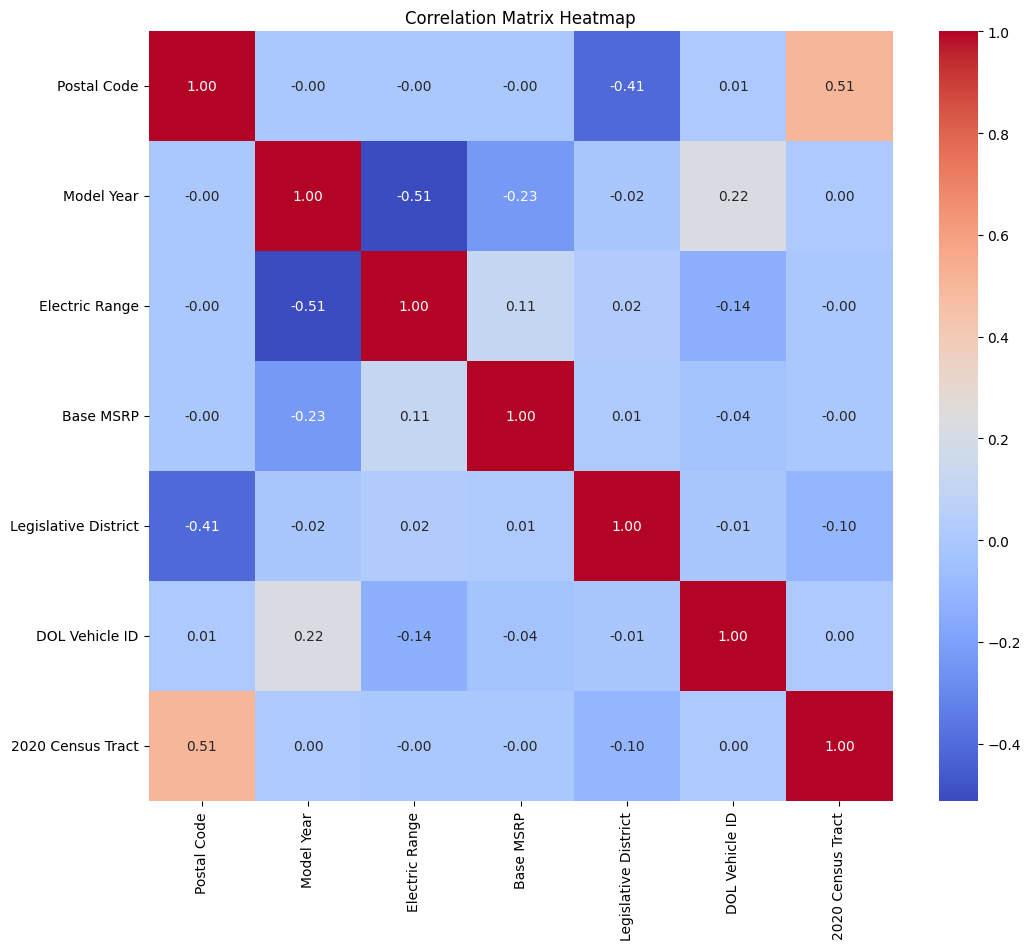

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
print("Conflict??")

Conflict??
